# Unsupervised Learning Project: Trade&Ahead

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [123]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [124]:
# Loading the dataset
data = pd.read_csv("stock_data.csv")


In [125]:
# Checking the number of rows and columns in the data
data.shape

(340, 15)

**There are 340 observations and 15 columns in the dataset**

In [126]:
#creating a copy of the dataset

df = data.copy()

In [127]:
# getting an overview of the dataset contents

df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [128]:
# getting an overview of the dataset contents

df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [129]:
# let's check the data types of the columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- 4 columns have object data type while the rest have either float64 or int64 datatype.

In [130]:
# let's check for duplicate values in the data

df.duplicated().sum()

0

- There are no duplicate values in the dataset

In [131]:
# let's check for missing values in the data

round(df.isnull().sum() / df.isnull().count() * 100, 2)

Ticker Symbol                   0.0
Security                        0.0
GICS Sector                     0.0
GICS Sub Industry               0.0
Current Price                   0.0
Price Change                    0.0
Volatility                      0.0
ROE                             0.0
Cash Ratio                      0.0
Net Cash Flow                   0.0
Net Income                      0.0
Earnings Per Share              0.0
Estimated Shares Outstanding    0.0
P/E Ratio                       0.0
P/B Ratio                       0.0
dtype: float64

- No missing values are present in the dataset

In [132]:
# Checking for the null value in the dataset
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- No missing values are present in the dataset

In [133]:
df.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

In [134]:
# let's view the statistical summary of the numerical columns in the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


- Statistical analysis reveals no anomalies

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [135]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,PSX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,Mylan N.V.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


In [136]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

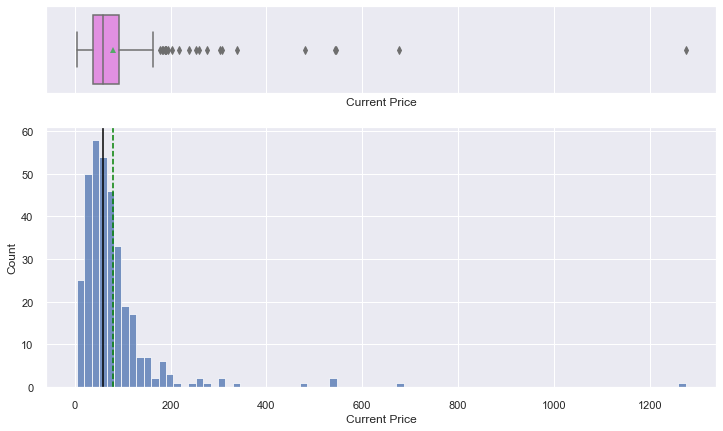

In [137]:
histogram_boxplot(df, 'Current Price')

- The distribution of the current price is skewed to the right.
- There are outliers to the right of the distribution.
- There are a large number of outliers which greatly exceed the mean.
- The median price is ~ 50.
- The mean price is ~ 70.

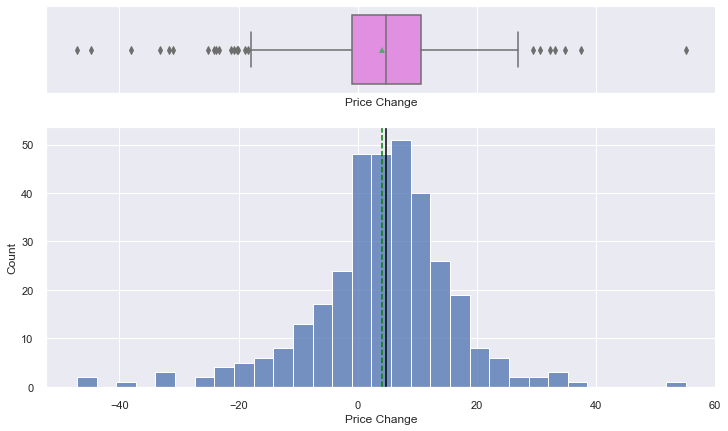

In [138]:
histogram_boxplot(df,'Price Change')

- The distribution of the price change is evenly distributed.
- There are outliers on both sides of the distribution.
- The median price change is ~ 5.
- The mean price is ~ 5.

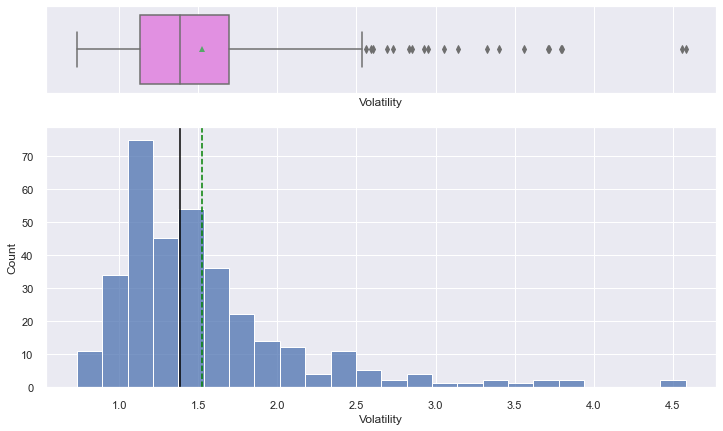

In [139]:
histogram_boxplot(df,'Volatility')

- The distribution of the volatility is skewed to the right.
- There are outliers to the right of the distribution.
- There are a number of outliers which greatly exceed the mean.
- The median volatilty is ~ 1.4.
- The mean volatility is ~ 1.5.

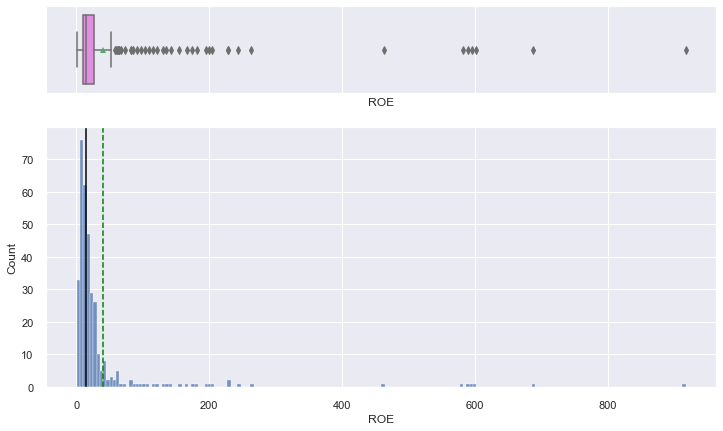

In [140]:
histogram_boxplot(df,'ROE')

- The distribution of the ROE is heavily skewed to the right.
- There are outliers to the right of the distribution.
- There are a large number of outliers which greatly exceed the mean.
- The median ROE is ~ 10.
- The mean ROE is ~ 20.

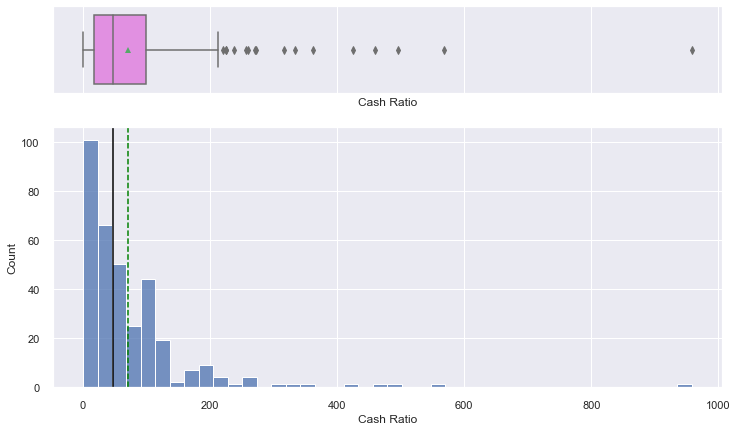

In [141]:
histogram_boxplot(df,'Cash Ratio')

- The distribution of cash ratio is skewed to the right.
- There are outliers to the right of the distribution.
- There are a number of outliers which greatly exceed the mean.
- The median cash ratio is ~ 60.
- The mean cash ratio is ~ 80.

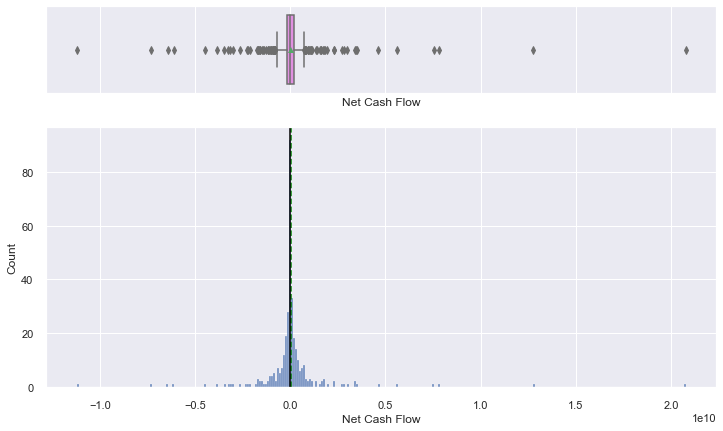

In [142]:
histogram_boxplot(df,'Net Cash Flow')

- The distribution of net cash flow is evenly distributed.
- There are outliers to both sides of the distribution.
- The median volatilty and the mean volatility are both 0.

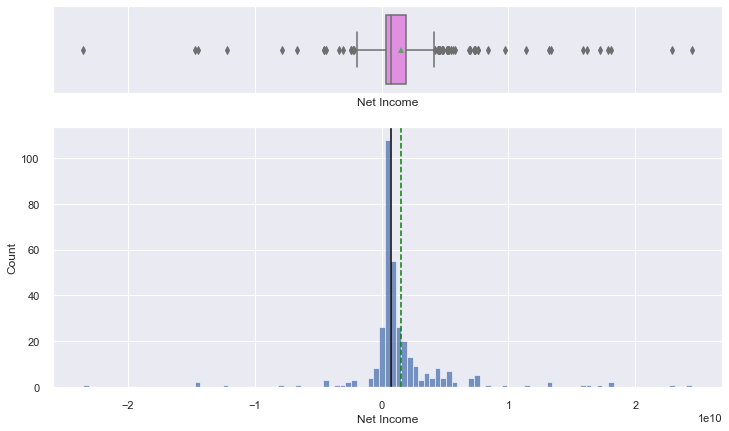

In [143]:
histogram_boxplot(df,'Net Income')

- The distribution of the net income column is evenly distributed.
- There are outliers on both sides of the distribution.
- The median net income is ~ 0.2.
- The mean net income is ~ 0.4.

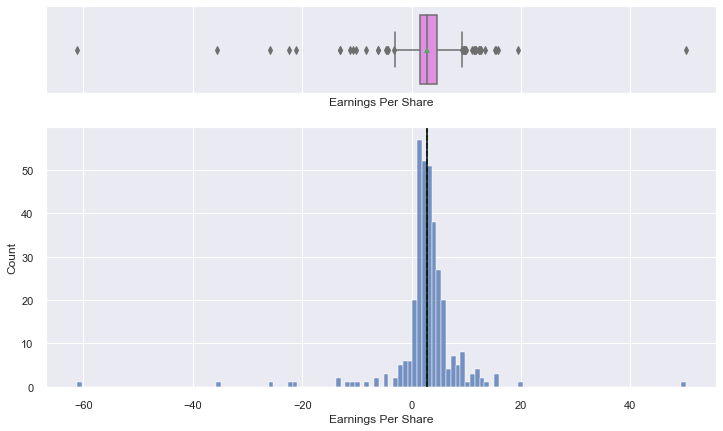

In [144]:
histogram_boxplot(df,'Earnings Per Share')

- The distribution of the earnings per share column is slightly skewed to the left.
- There are outliers on both sides of the distribution.
- The median net income is ~ 0.
- The mean net income is ~ 0.

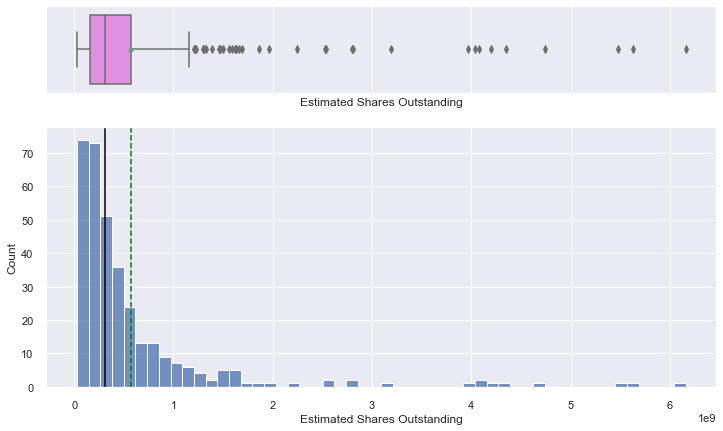

In [145]:
histogram_boxplot(df,'Estimated Shares Outstanding')

- The distribution of the estimated shares outstanding column is heavily skewed to the right.
- There are outliers to the right of the distribution.
- The median net income is ~ 0.25.
- The mean net income is ~ 0.5.

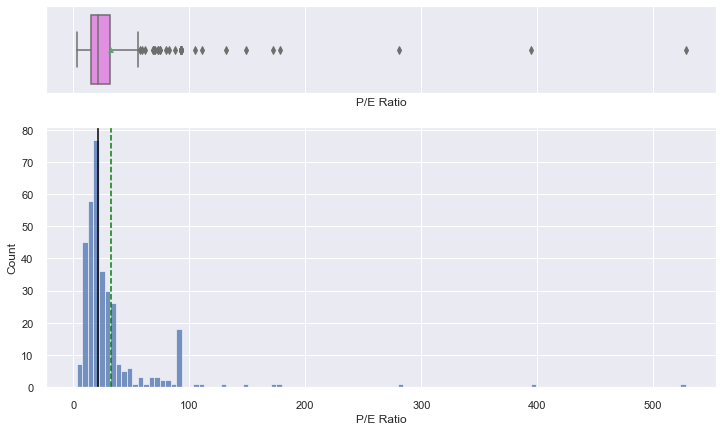

In [146]:
histogram_boxplot(df,'P/E Ratio')

- The distribution of the P/E Ratio column is skewed to the right.
- There are outliers to the right of the distribution.
- The median net income is ~ 20.
- The mean net income is ~ 30.

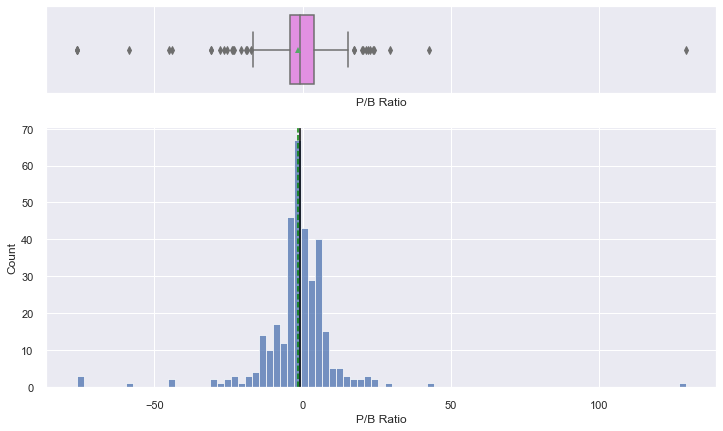

In [147]:
histogram_boxplot(df,'P/B Ratio')

- The distribution of the P/B Ratio column is evenly distributed.
- There are outliers on both sides of the distribution.
- The median net income is ~ 0.
- The mean net income is ~ 0.

In [148]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

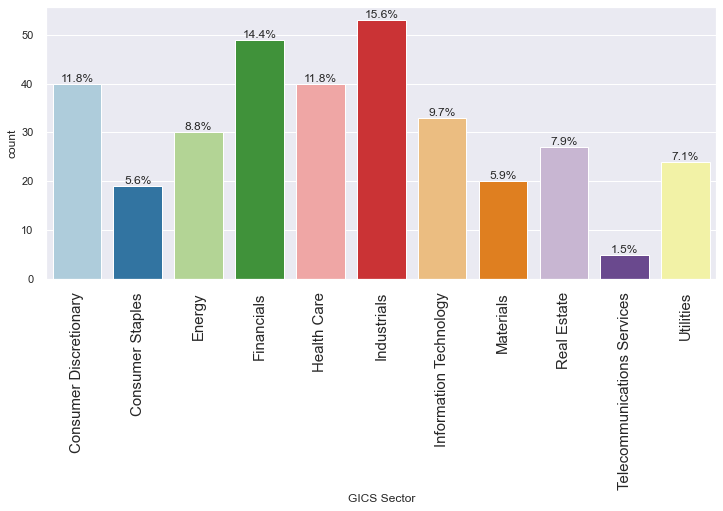

In [149]:
labeled_barplot(df, 'GICS Sector', perc=True)

- Industrials has the most companies attached to it with 15.6% .

- Telecommunications Services has the least companies attached to it with 1.5%.

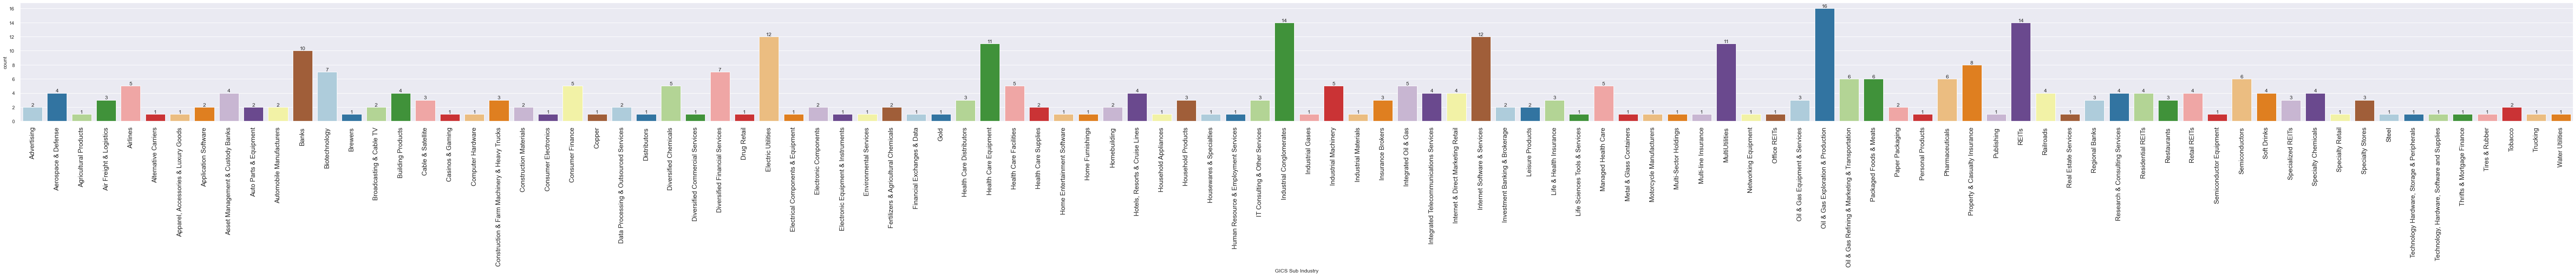

In [150]:
labeled_barplot(df,'GICS Sub Industry') 

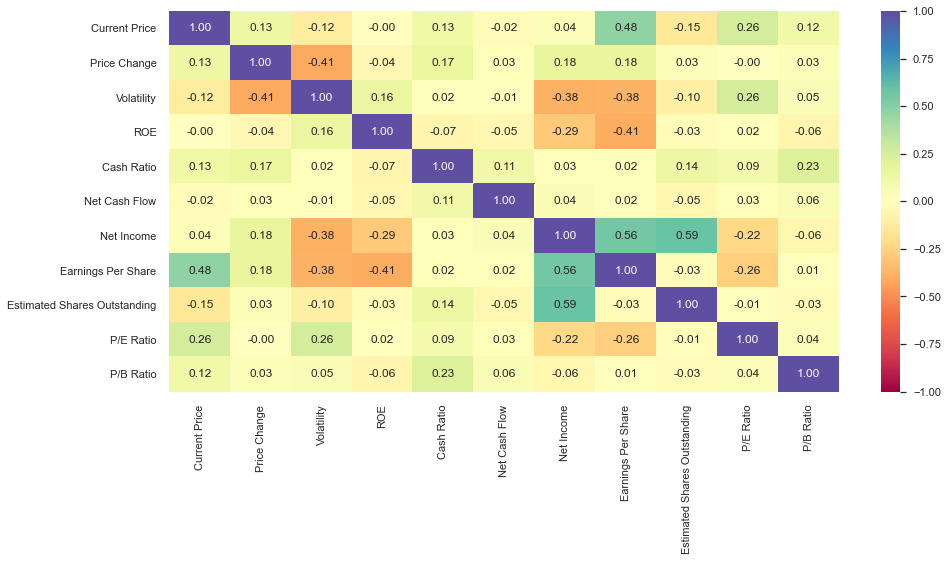

In [151]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Earnings per share has a strong positive correlation with current price and net income.

- Net Income has a positive correlation with estimated shares outstanding.

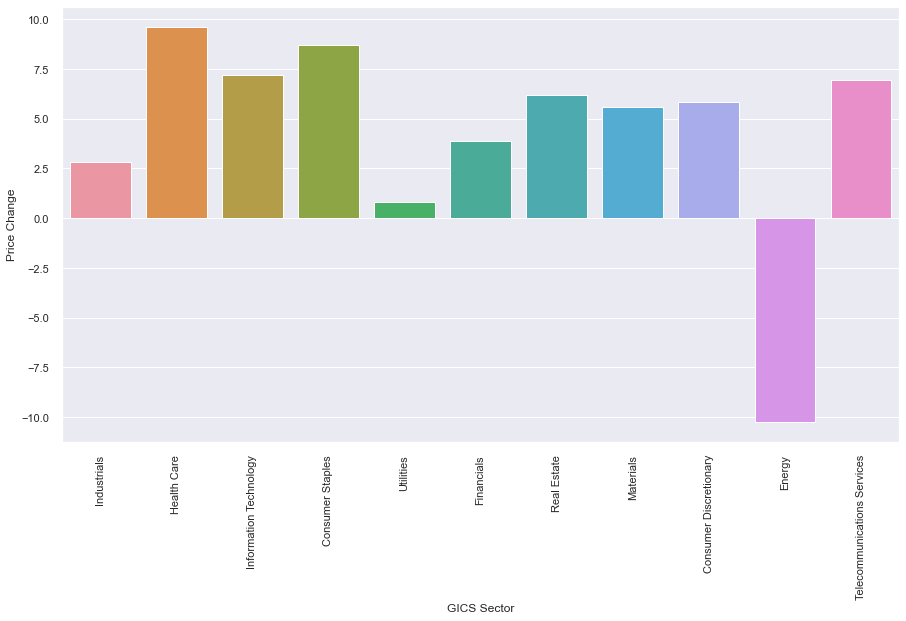

In [152]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

- Health Care has seen the biggest positive price change on average

- Energy has seen the biggest price change on average overall, albeit negatively

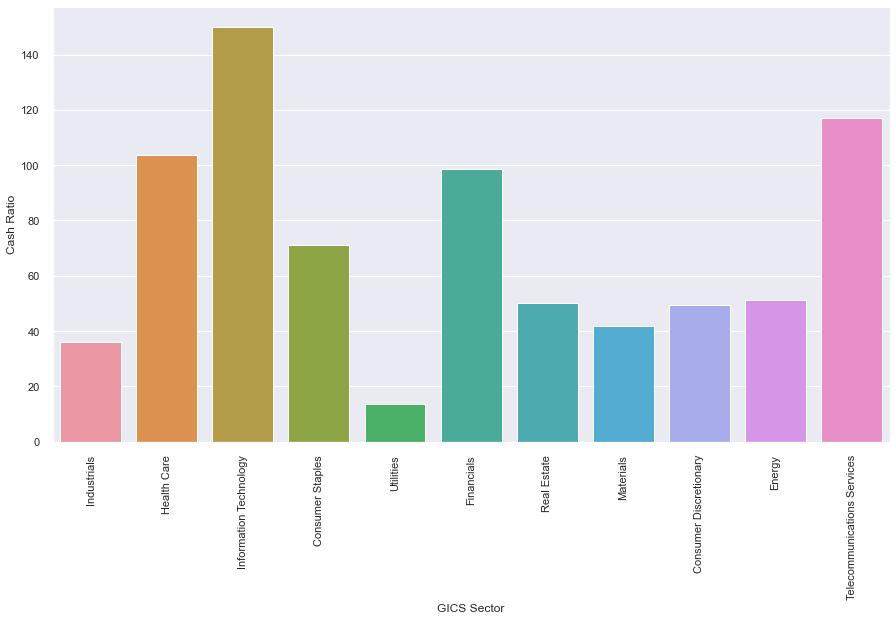

In [153]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

- The Information Technology sector has the largest cash ratio

- Utilities sector has the smallest cash ratio by some margin

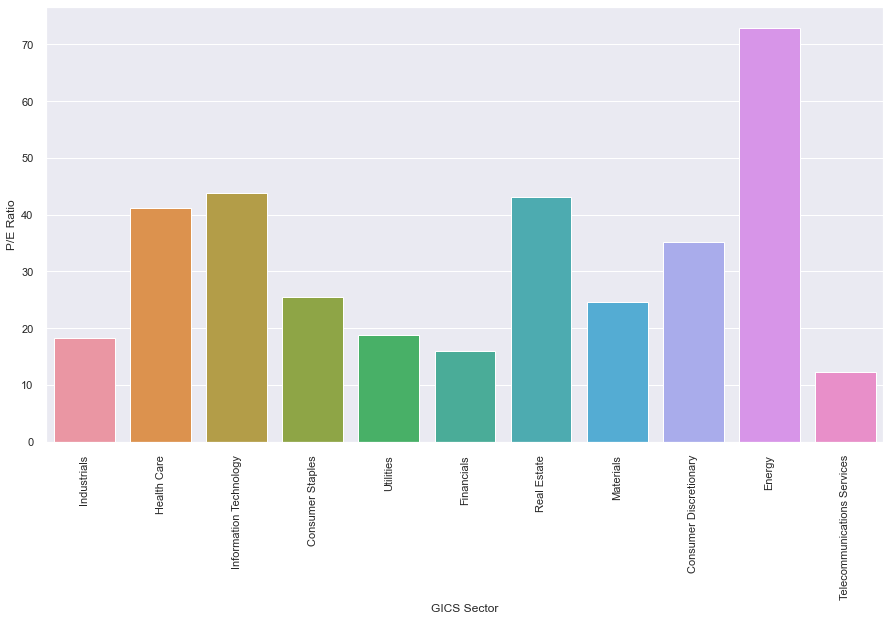

In [154]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

- The Energy sector has the highest P/E ratio while the Telecommunications sector has the lowest P/E ratio. 

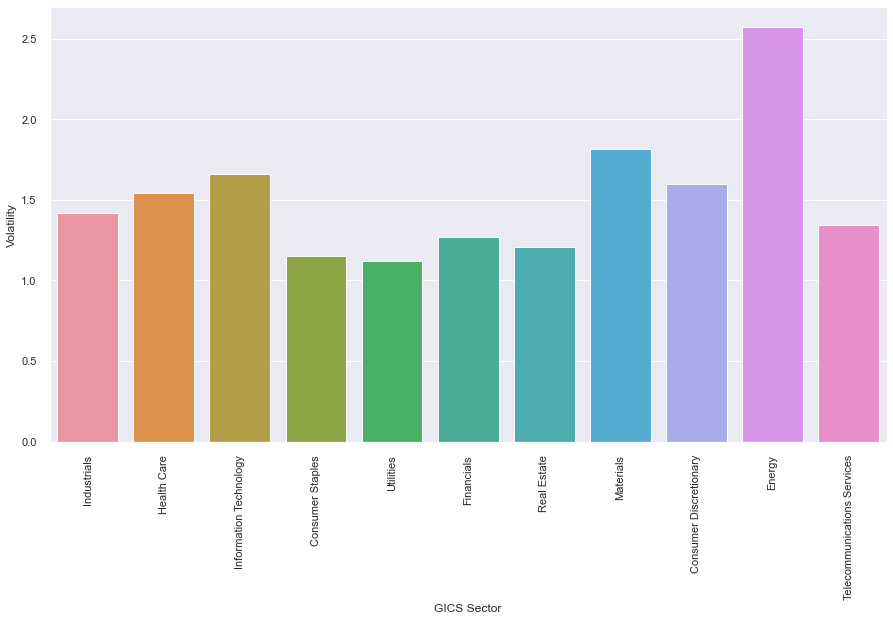

In [155]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

- The Energy sector has the highest volatility among all the sectors.

- All the remaining sectors have around the same level of volatility.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

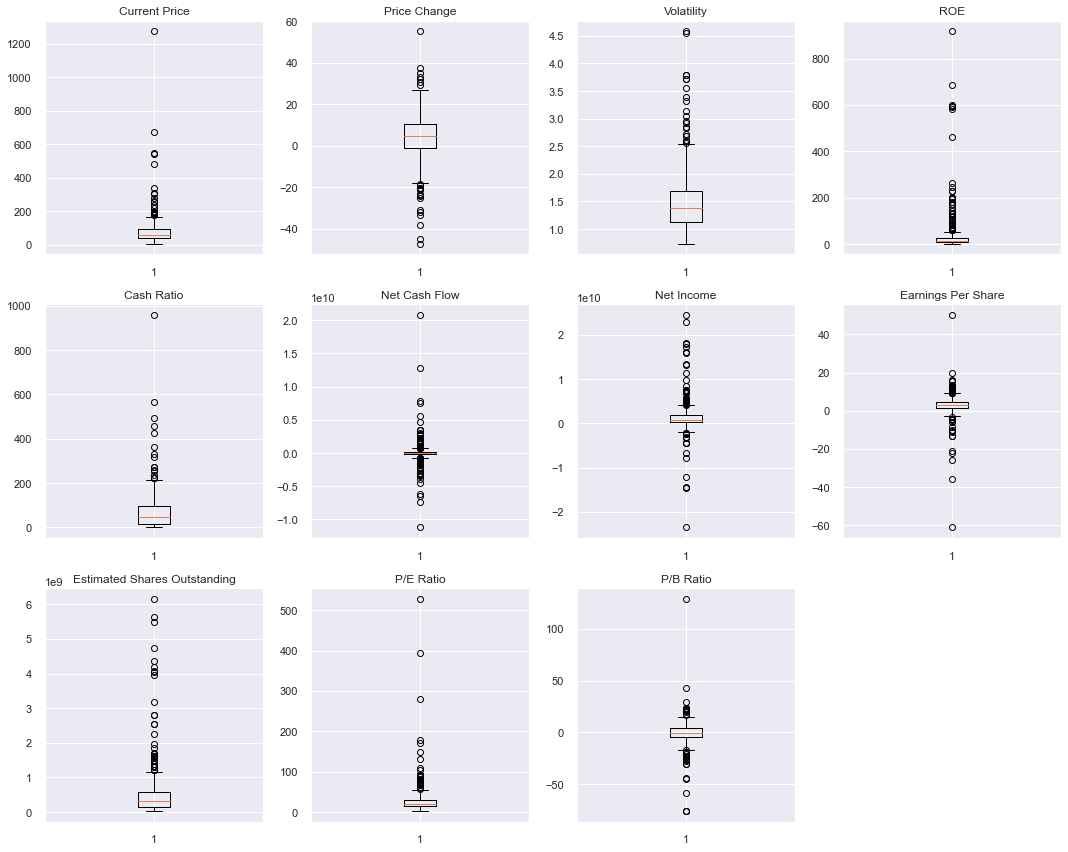

In [156]:
# creating boxplots to check for outliers

plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are significant outliers in all of the columns in the dataset.

In [157]:

# function to treat and remove outliers

def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df




def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df





In [158]:
# treating the outliers

numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df_without_outliers = treat_outliers_all(df, numerical_col)

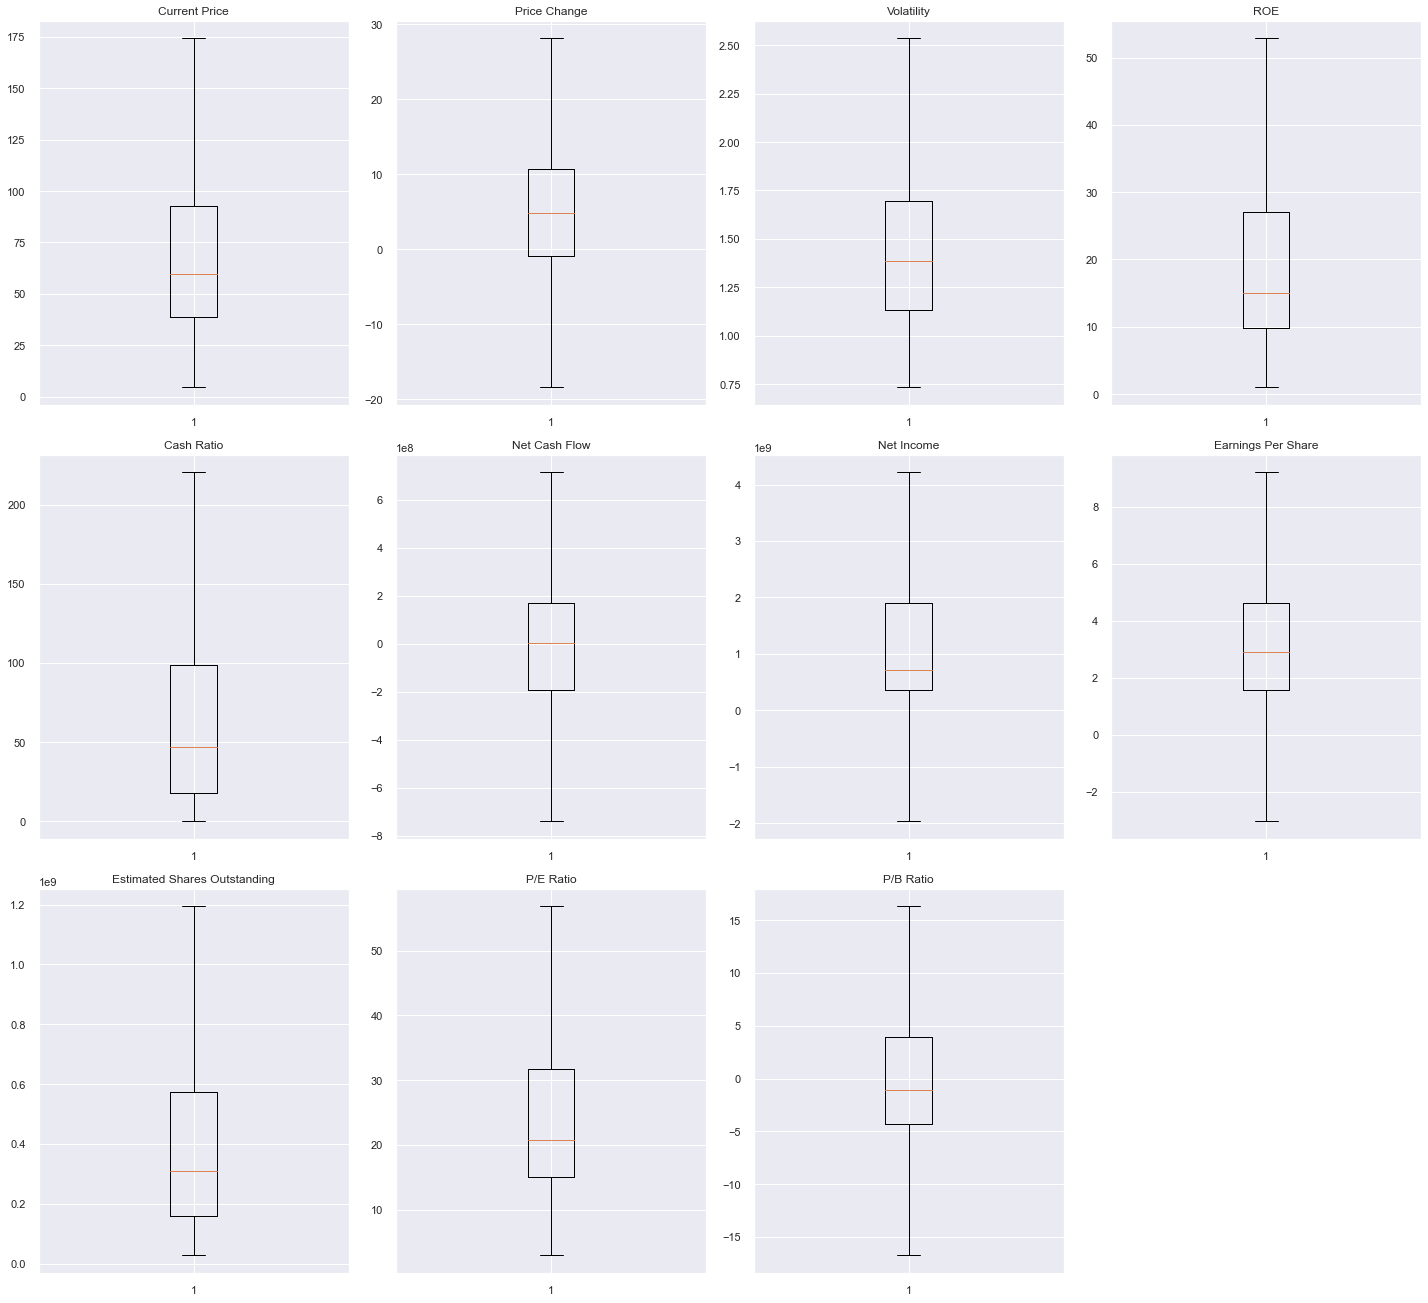

In [159]:
# let's look at the boxplots to see if the outliers have been treated or not

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df_without_outliers[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [160]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[numerical_col].copy()  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [161]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [162]:
# scaling the data with no outliers before clustering
scaler_no_outliers = StandardScaler()
subset_no_outliers = df_without_outliers[numerical_col].copy()  ## Complete the code to scale the data
subset_scaled_no_outliers = scaler.fit_transform(subset)

In [163]:
# creating a dataframe of the scaled data with no outliers
subset_scaled__no_outliers_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

In [164]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 3.1482665386211908
Number of Clusters: 2 	Average Distortion: 2.9507542400143847
Number of Clusters: 3 	Average Distortion: 2.759761533270845
Number of Clusters: 4 	Average Distortion: 2.63153843620545
Number of Clusters: 5 	Average Distortion: 2.5345886566890665
Number of Clusters: 6 	Average Distortion: 2.4703313338147543
Number of Clusters: 7 	Average Distortion: 2.3892036349104346
Number of Clusters: 8 	Average Distortion: 2.3415378767145505
Number of Clusters: 9 	Average Distortion: 2.302109092619317
Number of Clusters: 10 	Average Distortion: 2.2377809582576833
Number of Clusters: 11 	Average Distortion: 2.2045516262216522
Number of Clusters: 12 	Average Distortion: 2.183120889408329
Number of Clusters: 13 	Average Distortion: 2.136519876101571
Number of Clusters: 14 	Average Distortion: 2.1093177250276294


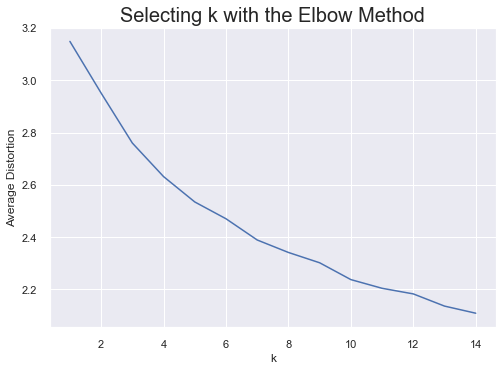

In [165]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

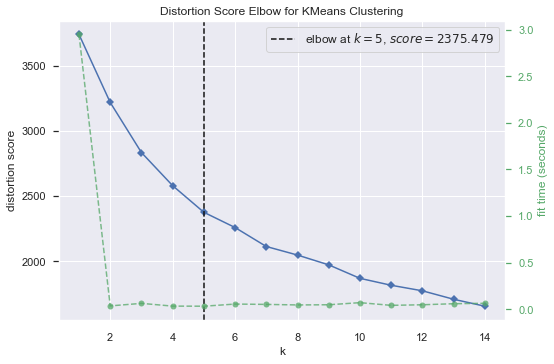

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [166]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Checking the silhouette scores.

For n_clusters = 2, the silhouette score is 0.14040363305436732)
For n_clusters = 3, the silhouette score is 0.1818864171381463)
For n_clusters = 4, the silhouette score is 0.1653160289647168)
For n_clusters = 5, the silhouette score is 0.14591373480130368)
For n_clusters = 6, the silhouette score is 0.14123009384579105)
For n_clusters = 7, the silhouette score is 0.13718112897820767)
For n_clusters = 8, the silhouette score is 0.13111986503005277)
For n_clusters = 9, the silhouette score is 0.128393144343582)
For n_clusters = 10, the silhouette score is 0.1393666960963218)
For n_clusters = 11, the silhouette score is 0.135393326699983)
For n_clusters = 12, the silhouette score is 0.13543944176814168)
For n_clusters = 13, the silhouette score is 0.13808929034629017)
For n_clusters = 14, the silhouette score is 0.12467396300203645)


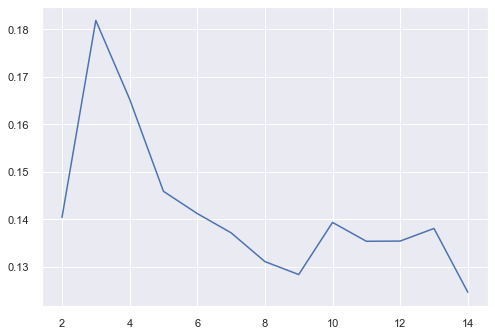

In [167]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Silhouette score for 3 is higher than that for 2. So, we will choose 3 as value of k.**

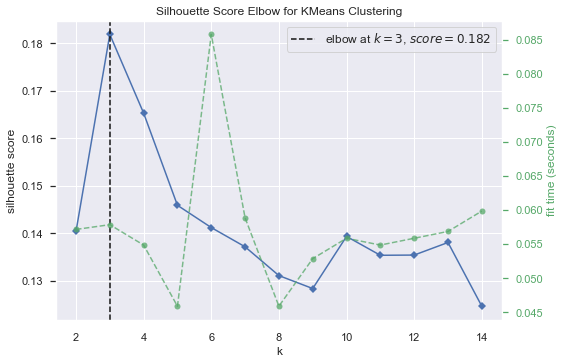

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [168]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

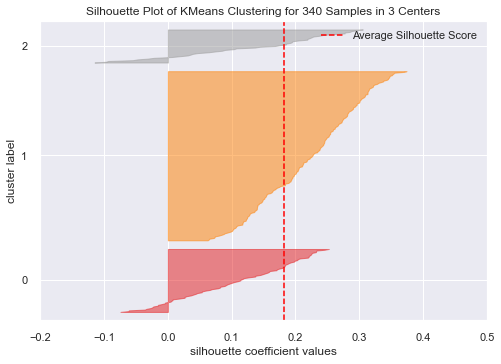

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [169]:
# finding optimal no. of clusters with silhouette coefficients

visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

In [170]:
# final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [171]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiles

In [172]:
km_cluster_profile = df1.groupby("KM_segments").mean()  ## Complete the code to groupby the cluster labels

In [173]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [174]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.060189,7.778991,1.316451,24.114198,72.870370,42504310.185185,3381668570.987654,4.679522,895182890.327623,18.463929,-1.422011,81
1,75.974806,5.046375,1.388462,18.602431,56.342593,-18727880.208333,739246236.111111,3.322668,251143254.652280,24.383303,-1.892931,216
2,38.743228,-5.624054,2.270635,23.366279,78.546512,-22399406.976744,-613922793.604651,-1.009680,520677832.549477,44.880598,2.536273,43


In [175]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories' 'AFLAC Inc'
 'American International Group, Inc.' 'Applied Materials Inc' 'Amgen Inc'
 'Broadcom' 'American Express Co' 'Boeing Company' 'Bank of America Corp'
 'BB&T Corporation' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Bristol-Myers Squibb' 'Citigroup Inc.' 'Caterpillar Inc.'
 'Chubb Limited' 'Carnival Corp.' 'Colgate-Palmolive'
 'Capital One Financial' 'CSX Corp.' 'CVS Health' 'Chevron Corp.'
 'Delta Air Lines' 'Du Pont (E.I.)' 'Discover Financial Services'
 'Danaher Corp.' 'The Walt Disney Company' 'Duke Energy' 'eBay Inc.'
 'Ford Motor' 'Facebook' 'General Dynamics' 'Gilead Sciences'
 'Corning Inc.' 'General Motors' "Honeywell Int'l Inc." 'HP Inc.'
 'International Business Machines' 'Intel Corp.' 'JPMorgan Chase & Co.'
 'Coca Cola Company' 'Lilly (Eli) & Co.' 'Lockheed Martin Corp.'
 'Southwest Airlines' 'Level 3 Communications' 'LyondellBasell'
 'Mastercard

In [176]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          5
             Consumer Staples                8
             Energy                          5
             Financials                     18
             Health Care                    11
             Industrials                    15
             Information Technology         11
             Materials                       2
             Telecommunications Services     3
             Utilities                       3
1            Consumer Discretionary         34
             Consumer Staples               11
             Energy                          1
             Financials                     30
             Health Care                    26
             Industrials                    36
             Information Technology         16
             Materials                      15
             Real Estate                    25
             Telecommunications Services     1
             Utilit

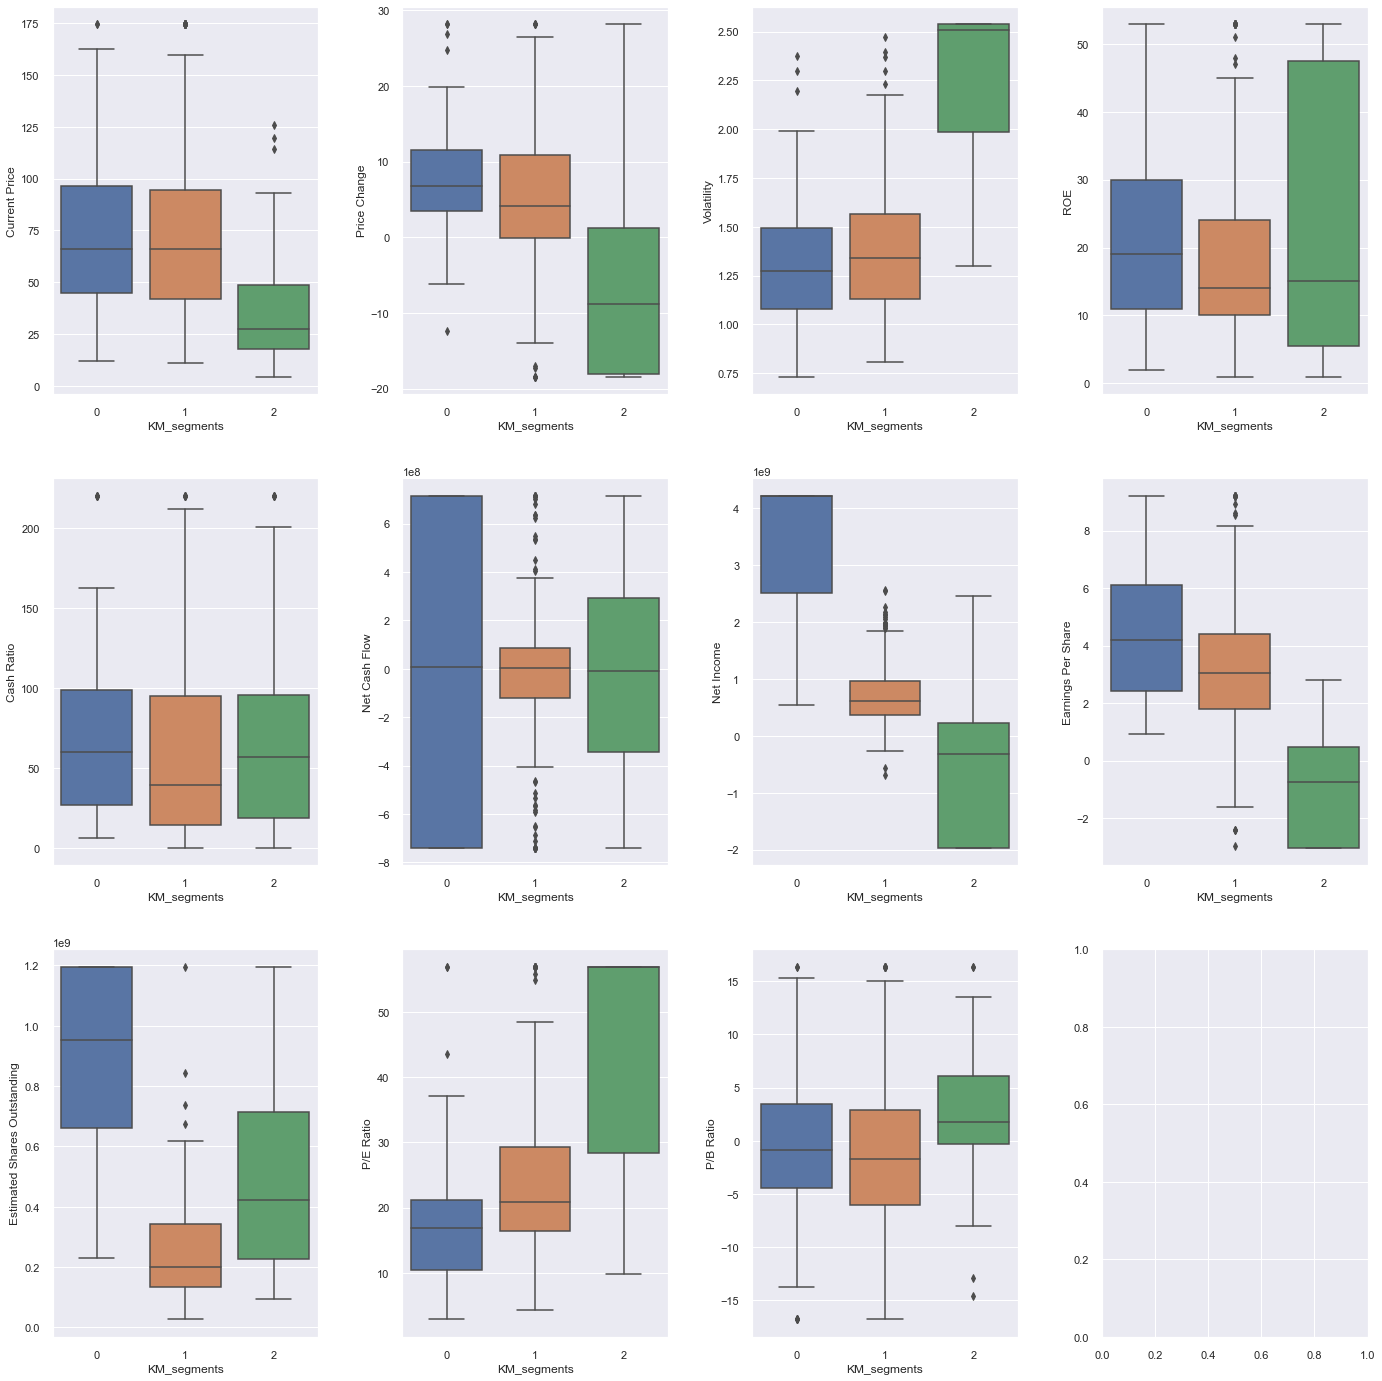

In [177]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## Insights

- **Cluster 0**:
    - This cluster contains the stocks with the highest price changes.
    - This cluster contains the stocks with the highest average ROE.
    - This cluster contains the stocks with the highest net income.
    - This cluster contains the stocks with the highest earnings per share.
    - This cluster contains the stocks with the highest estimated shares.
    - This cluster contains the stocks with the lowest volatility.
    - This cluster contains the stocks with the lowest P/E Ratio.
    
   
- **Cluster 1**:
    - This cluster contains the stocks with the lowest estimated shares outstanding.
    - This cluster contains the stocks with a higher P/E Ratio than cluster 0.
    - This cluster contains the stocks with a lower earnings per share than cluster 0.
    - This cluster contains the stocks with a lower average net income than cluster 0.
    - This cluster contains the stocks with a higher volatility than cluster 0
  
  
    
- **Cluster 2**:
    - This cluster contains the stocks with the highest volatility.
    - This cluster contains the stocks with the highest P/E Ratio.
    - This cluster contains the stocks with the lowest current price.
    - This cluster contains the stocks with the lowest average price changes.
    - This cluster contains the stocks with the lowest net income.
    - This cluster contains the stocks with the lowest earnings per share.
    

In [178]:
pd.crosstab(df1.KM_segments, df1['GICS Sector']).style.highlight_max(
    color="lightgreen", axis=0
)

GICS Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
KM_segments,,,,,,,,,,,
0,5,8,5,18,11,15,11,2,0,3,3
1,34,11,1,30,26,36,16,15,25,1,21
2,1,0,24,1,3,2,6,3,2,1,0


- Majority of the stocks belongs to cluster 1.

## Hierarchical Clustering

In [179]:
hc_df = subset_scaled_df.copy()

In [180]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.6932108674136778.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6147798823663769.
Cophenetic correlation for Euclidean distance and average linkage is 0.7325610568988988.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6496438783746495.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7214024727237498.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.3680593124794425.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7011385715318806.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5032471223561586.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6176064847170997.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.38543044504439705.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.641587600792573.
Cophenetic co

**Exploring different linkage methods with Euclidean distance only.**

In [181]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.6932108674136778.
Cophenetic correlation for complete linkage is 0.6147798823663769.
Cophenetic correlation for average linkage is 0.7325610568988988.
Cophenetic correlation for weighted linkage is 0.6496438783746495.
****************************************************************************************************
Highest cophenetic correlation is 0.7325610568988988, which is obtained with average linkage.


**Viewing the dendrograms for the different linkage methods with Euclidean distance.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## Insights

- **Cluster 0**:
    - This cluster contains the stocks with positive price changes.
    - This cluster contains the stocks with the lowest volatility.
    - This cluster contains the stocks with the highest net income.
    - This cluster contains the stocks with the highest earnings per share.
    - This cluster contains the stocks with the lowest P/E Ratio.
    
   
- **Cluster 1**:
    - This cluster contains the stocks with the lowest current price.
    - This cluster contains the stocks with on average negative price change.
    - This cluster contains the stocks with the highest volatility on average.
    - This cluster contains the stocks with the highest ROE on average.
    - This cluster contains the stocks with the lowest net income on average.
    - This cluster contains the stocks with the lowest earnings per share on average.
    - This cluster contains the stocks with the highest estimated shares outstanding.
    - This cluster contains the stocks with the highest P/E Ratio on average.
  
  
    
- **Cluster 2**:
    - This cluster contains the stocks with the highest current price.
    - This cluster contains the stocks with the highest average price changes.
    - This cluster contains the stocks with the lowest ROE.
    - This cluster contains the stocks with the highest P/E Ratio.
    - This cluster contains the stocks with the highest P/B Ratio.
    - This cluster contains the stocks with the highest cash ratio.

## K-means vs Hierarchical Clustering

- K-means clustering took less time to execute than Heirarchical clustering.
- K means clustering gave slightly more distinct clusters than heirarchical clustering.
- Both algorithms obtain 3 clusters as the appropriate amount of clusters.
- The observations in similar clusters across algorithms vary significantly.
- The silhouette scores for heirachical clustering are highre than that of k-means clustering.

## Actionable Insights and Recommendations

- Using k-means clustering, cluster 0 contains stocks with the highest price and postive price changes as well as having the lowest volatility on average. These stocks are good stocks to invest in.

- Stocks in cluster 2 should be avoided due to the high volatilty and negative price difference. It poses a significant risk.

- Stocks in cluster 1 are more stable than those in cluster 2. There also have the largest cluster. These pose low and affordable risk.